# Clustering

Scaler, as an emerging tech-versity, endeavors to provide world-class education
in computer science & data science domains.
 - A significant challenge for Scaler is understanding the diverse backgrounds of its
learners, especially in terms of their current roles, companies, and experience.
Clustering similar learners helps in customizing the learning experience, thereby
increasing retention and satisfaction.
 - Analyzing the vast data of learners can uncover patterns in their professional
backgrounds and preferences. This allows Scaler to make tailored content
recommendations and provide specialized mentorship.
 - By leveraging data science and unsupervised learning, particularly clustering
techniques, Scaler can group learners with similar profiles, aiding in delivering a
more personalized learning journey.

## Dataset Explanation: scaler_kmeans.csv
1. Unnamed 0: The index of the dataset.
2. Email_hash: An anonymized identifier representing the email of the learner.
3. Company_hash: An anonymized identifier indicating the current employer of the learner.
4. orgyear: Represents the year the learner began employment at the current company.
5. CTC: Current Compensation to the Company (CTC) of the learner.
6. Job_position: Represents the job profile or role of the learner within their company.
7. CTC_updated_year: The year in which the learner's CTC was most recently updated. This could be due to yearly increments, promotions, or other factors.

## What is Expected?
Assuming you're a data scientist at Scaler, you're tasked with the responsibility of
analyzing the dataset to profile the best companies and job positions from Scaler's
database. Your primary goal is to execute clustering techniques, evaluate the
coherence of your clusters, and provide actionable insights for enhanced learner
profiling and course tailoring.




In [43]:
## imports packages
%reload_ext lab_black
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

### Dataset Import and basic understanding of the data.


#### 1. Observations on Data

In [44]:
df = pd.read_csv(
    "C:\\Ankit\\DL_Specialization\\my_Practice\\datasets\\scaler_kmeans.txt"
)
## drop unnecessary column
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000.0,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999.0,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000.0,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000.0,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000.0,FullStack Engineer,2019.0


In [45]:
df.shape

(40791, 6)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40791 entries, 0 to 40790
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_hash      40779 non-null  object 
 1   email_hash        40791 non-null  object 
 2   orgyear           40761 non-null  float64
 3   ctc               40790 non-null  float64
 4   job_position      28711 non-null  object 
 5   ctc_updated_year  40790 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.9+ MB


In [47]:
## percentage of outliers
def check_null_praportions(data):
    # return (data.isnull().sum() / len(df)) * 100
    return ((data.isnull().sum() / len(data)) * 100).sort_values(ascending=False)

job_position        29.614376
orgyear              0.073546
company_hash         0.029418
ctc                  0.002452
ctc_updated_year     0.002452
email_hash           0.000000
dtype: float64

<Axes: >

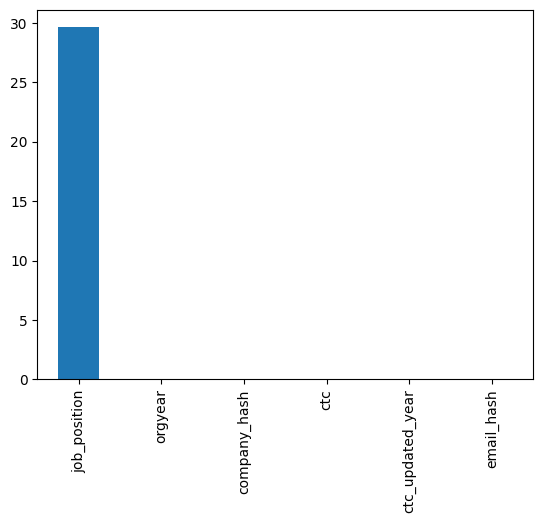

In [48]:
display(check_null_praportions(df), check_null_praportions(df).plot(kind="bar"))

## Observations :
# 1. For 29% of users job_position is NULL.

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
orgyear,40761.0,2.015613e+03,2.743551e+01,0.0,2014.0,2017.0,2018.0,2107.0
ctc,40790.0,3.557417e+06,1.917192e+07,1000.0,470000.0,780000.0,1350000.0,250000000.0
ctc_updated_year,40790.0,2.020216e+03,8.758136e-01,2015.0,2020.0,2020.0,2021.0,2021.0


In [50]:
df.nunique()

company_hash        10914
email_hash          33813
orgyear                55
ctc                  1165
job_position          318
ctc_updated_year        7
dtype: int64

In [51]:
cols = df.columns
numeric_cols = df._get_numeric_data().columns
cat_columns = list(set(cols) - set(numeric_cols))
print("Numeric columns from the dataset are :", numeric_cols.values)
print("Categorical columns from the datset are :", cat_columns)

Numeric columns from the dataset are : ['orgyear' 'ctc' 'ctc_updated_year']
Categorical columns from the datset are : ['email_hash', 'company_hash', 'job_position']


#### 2. Univariate Analysis

C:\Users\INACHAVH\AppData\Local\anaconda3\envs\SoApp-stat-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\INACHAVH\AppData\Local\anaconda3\envs\SoApp-stat-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\INACHAVH\AppData\Local\anaconda3\envs\SoApp-stat-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\INACHAVH\AppData\Local\anaconda3\envs\SoApp-stat-venv\Lib\site-packages\seaborn

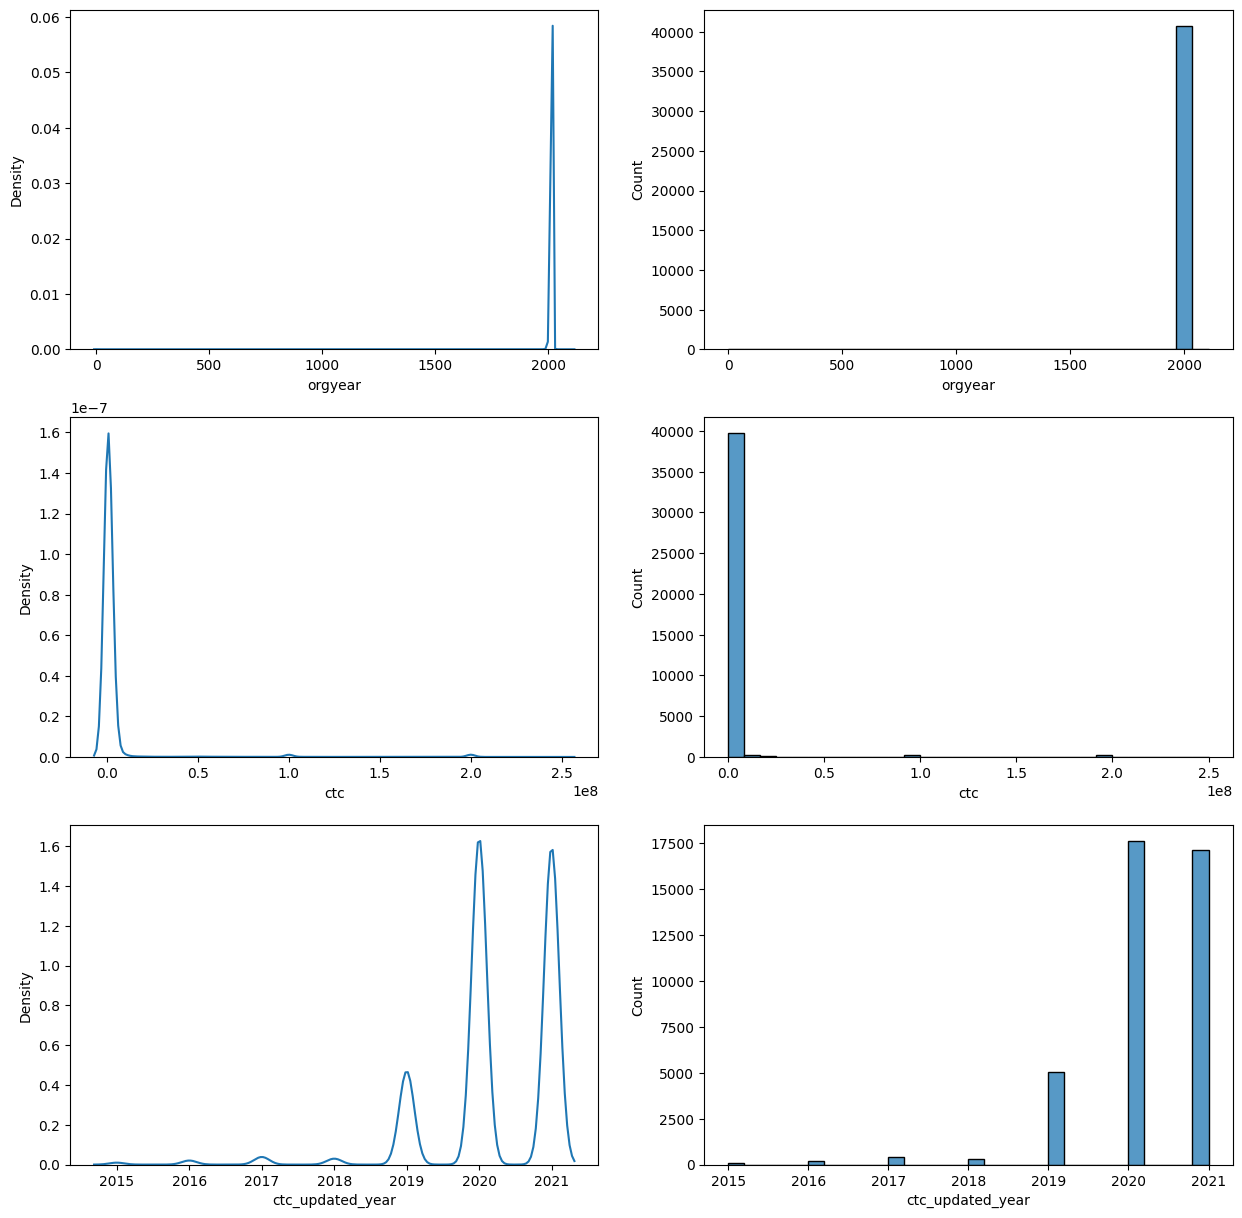

In [52]:
## For numerical vaiables :
## 'orgyear', 'ctc' and 'ctc_updated_year'

# define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
## Row 1
sns.kdeplot(data=df, x="orgyear", ax=axes[0, 0])
sns.histplot(data=df, x="orgyear", bins=30, ax=axes[0, 1])
## Row 2
sns.kdeplot(data=df, x="ctc", ax=axes[1, 0])
sns.histplot(data=df, x="ctc", bins=30, ax=axes[1, 1])
## Row 3
sns.kdeplot(data=df, x="ctc_updated_year", ax=axes[2, 0])
sns.histplot(data=df, x="ctc_updated_year", bins=30, ax=axes[2, 1])

plt.show()
##observations :
# 1. In year 2000 most of the learners, joined company
# 2. In year 2000 for most of the learners CTC got updated (might recieve Promotions or joined new company)

job_position
Backend Engineer          7293
Other                     5271
FullStack Engineer        5167
Frontend Engineer         1946
Support Engineer          1405
QA Engineer               1326
Data Analyst               930
Engineering Leadership     699
Data Scientist             625
Android Engineer           600
Name: count, dtype: int64

<Axes: xlabel='job_position'>

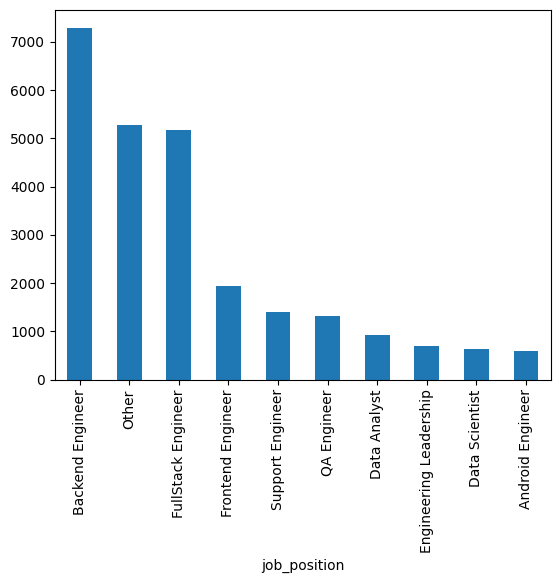

In [53]:
## For Categorical vaiables :
## 'job_position', 'company_hash', 'email_hash'
display(
    df["job_position"].value_counts().sort_values(ascending=False).head(10),
    df["job_position"]
    .value_counts()
    .sort_values(ascending=False)
    .head(10)
    .plot(kind="bar"),
)

## Observations :
# 1. Below is a list of the top 10 positions that learners belong to,
#    ranked in order of prevalence.

company_hash
nvnv wgzohrnvzwj otqcxwto    2326
xzegojo                      1427
wgszxkvzn                     982
vwwtznhqt                     837
zgn vuurxwvmrt vwwghzn        784
fxuqg rxbxnta                 784
vbvkgz                        567
wvustbxzx                     498
ywr ntwyzgrgsxto              419
gqvwrt                        385
Name: count, dtype: int64

<Axes: xlabel='company_hash'>

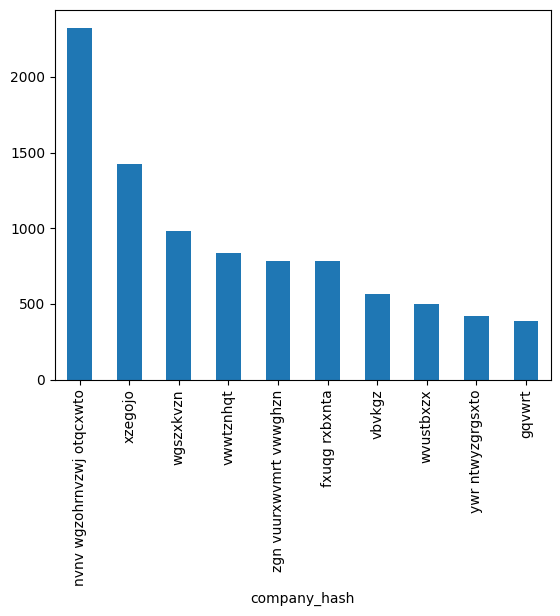

In [54]:
display(
    df["company_hash"].value_counts().sort_values(ascending=False).head(10),
    df["company_hash"]
    .value_counts()
    .sort_values(ascending=False)
    .head(10)
    .plot(kind="bar"),
)
## Observations :
# 1. Below is a list of the top 10 companies (in hashes) that learners belong to,
#    ranked in order of prevalence.

#### 3. Bivariate analysis

Bellow mentioned are category of variables:
 - Numeric variables :['orgyear' ,'ctc' ,'ctc_updated_year']
 - Categorical variables : ['job_position', 'company_hash', 'email_hash']

##### Among Numerical-Numerical variables.:

In [55]:
df["job_position"].nunique()

318

In [56]:
(df["job_position"] == "nan").sum()

0

In [57]:
def preprocess_string(string):
    new_string = re.sub("[^A-Za-z ]+", "", string).lower().strip()
    return new_string

In [58]:
print("company_hash shape before preprocess", df["company_hash"].nunique())
df["company_hash"] = df["company_hash"].apply(lambda x: preprocess_string(str(x)))
print("company_hash shape after preprocess", df["company_hash"].nunique())

company_hash shape before preprocess 10914
company_hash shape after preprocess 10895


In [59]:
print("job_position shape before preprocess", df["job_position"].nunique())
df["job_position"] = df["job_position"].apply(lambda x: preprocess_string(str(x)))
print("job_position shape after preprocess", df["job_position"].nunique())

job_position shape before preprocess 318
job_position shape after preprocess 289


In [60]:
# removing the email_hash
df.drop("email_hash", axis=1, inplace=True)

In [61]:
df.duplicated().sum()

2487

In [62]:
df.isna().sum()

company_hash         0
orgyear             30
ctc                  1
job_position         0
ctc_updated_year     1
dtype: int64

In [63]:
display(df[df["ctc"].isna()], df[df["ctc_updated_year"].isna()])

## Observation
# 1. Below 2 rows have NaN for all the features.
# 2. Theredfore,removing them from data frame

,company_hash,orgyear,ctc,job_position,ctc_updated_year
40790,lrr,NaN,NaN,nan,NaN


,company_hash,orgyear,ctc,job_position,ctc_updated_year
40790,lrr,NaN,NaN,nan,NaN


In [64]:
## drop ROWS
df.drop(index=[40790], inplace=True)

In [65]:
len(df[(df["company_hash"] == "") | (df["job_position"] == "")])
## Observation
# 1. Their are 23 row where company_hash OR job_position is NULL

23

In [66]:
## Remove row with "company_hash" OR "job_position" == NULL
df = df[~((df["company_hash"] == "") | (df["job_position"] == ""))]

In [67]:
df["orgyear"].isna().sum()

29

In [68]:
df.groupby("company_hash")["orgyear"].transform("median")
df["orgyear"].fillna(df["orgyear"].isnull().sum(), inplace=True)

C:\Users\INACHAVH\AppData\Local\Temp\ipykernel_13032\3675584838.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["orgyear"].fillna(df["orgyear"].isnull().sum(), inplace=True)


#### removing outlier from Orgyear column

In [69]:
sorted(df["orgyear"].fillna(0).astype(int).unique())

## observations :
# 1. Below mentioned years have not occured.Thereore removing those.
#  2024,
#  2025,
#  2026,
#  2029,
#  2031,
#  2101,
#  2106,
#  2107

[0,
 29,
 206,
 208,
 209,
 1970,
 1972,
 1973,
 1981,
 1982,
 1985,
 1986,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2029,
 2031,
 2101,
 2106,
 2107]

In [70]:
df = df[~df["orgyear"].isin([2024, 2025, 2026, 2029, 2031, 2101, 2106, 2107])]

## Removing org year which are not possible

#### Update job_position, their are many places where Job position is not correct changing those values
#### Below values are updated 
1.  'cant reveal' --> others
2. 'l' --> others
3. 'maricketing' --> marketing
4. 'nan' --> others
5. 'no job' --> others
6. 'not applicable' --> others
7. 'not employed' --> others
8. 'other' --> others
9. 'others' --> others
10. 'sr' --> 'backend engineer'	



In [71]:
# df.loc[df["job_position"] == "cant reveal"]
row_idx = df.loc[df["job_position"] == "sr"].index
for i in row_idx:
    df.loc[i, "job_position"] = "backend engineer"

In [72]:
# df.loc[df["job_position"] == "sr"]
# df.loc[
#     (df["company_hash"] == "zgn vuurxwvmrt vwwghzn")
#     & (df["orgyear"] == 2013)
#     & (df["ctc_updated_year"] == 2021)
# ]["job_position"].value_counts()

#### Feature engineering
- From current year and orgyear difference, we can find TotalExperience feature.
- 

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40745 entries, 0 to 40789
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_hash      40745 non-null  object 
 1   orgyear           40745 non-null  float64
 2   ctc               40745 non-null  float64
 3   job_position      40745 non-null  object 
 4   ctc_updated_year  40745 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.9+ MB


CTC_updated_year
1.0    36878
0.0     3867
Name: count, dtype: int64

<Axes: xlabel='CTC_updated_year'>

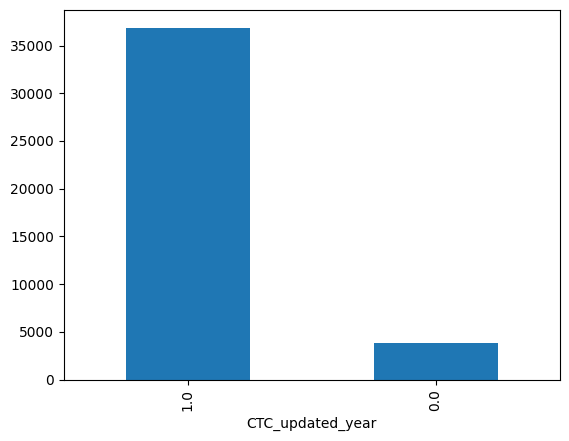

In [74]:
df.sample(20)


def check_promotions(df):
    """
    If a learner has recieved promotion, than 1 otherwise O
    """
    if df["orgyear"] < df["ctc_updated_year"]:
        df["CTC_updated_year"] = 1
    else:
        df["CTC_updated_year"] = 0


df["CTC_updated_year"] = np.nan
for index, row in df.iterrows():
    if row["orgyear"] < row["ctc_updated_year"]:
        df.loc[index, "CTC_updated_year"] = 1
    else:
        df.loc[index, "CTC_updated_year"] = 0
display(
    df["CTC_updated_year"].value_counts(),
    df["CTC_updated_year"].value_counts().plot(kind="bar"),
)
## Observations :-
# 1. 36878 learners got promotions.
# 2. 3872 recieved No promotions.

In [75]:
# years of experience
df["years_of_experience_in_organization"] = 2023 - df["orgyear"]

In [76]:
df.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,CTC_updated_year,years_of_experience_in_organization
0,atrgxnnt xzaxv,2016.0,1100000.0,other,2020.0,1.0,7.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,1.0,5.0
2,ojzwnvwnxw vx,2015.0,2000000.0,backend engineer,2020.0,1.0,8.0
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,1.0,6.0
4,qxen sqghu,2017.0,1400000.0,fullstack engineer,2019.0,1.0,6.0


In [77]:
X_data = df.drop(["company_hash", "job_position"], axis=1)

#### Standardization:

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_data)
X_sc = pd.DataFrame(
    scaler.transform(X_data), columns=X_data.columns, index=X_data.index
)

In [79]:
X_sc

,orgyear,ctc,ctc_updated_year,CTC_updated_year,years_of_experience_in_organization
0,0.030386,-0.128097,-0.246155,0.32382,-0.030386
1,0.063910,-0.162037,-1.387694,0.32382,-0.063910
2,0.013624,-0.081103,-0.246155,0.32382,-0.013624
3,0.047148,-0.148983,-1.387694,0.32382,-0.047148
4,0.047148,-0.112432,-1.387694,0.32382,-0.047148
...,...,...,...,...,...
40785,0.080671,-0.175091,0.895385,0.32382,-0.080671
40786,0.097433,-0.169869,0.895385,0.32382,-0.097433
40787,0.013624,-0.138540,0.895385,0.32382,-0.013624
40788,0.030386,-0.164648,0.895385,0.32382,-0.030386


#### hierarchical Custering :
 - trying to get a high level idea about how many clusters we can from, by taking sample of 500 learners multiple times and forming hierarchy and visualising in dendrogram.

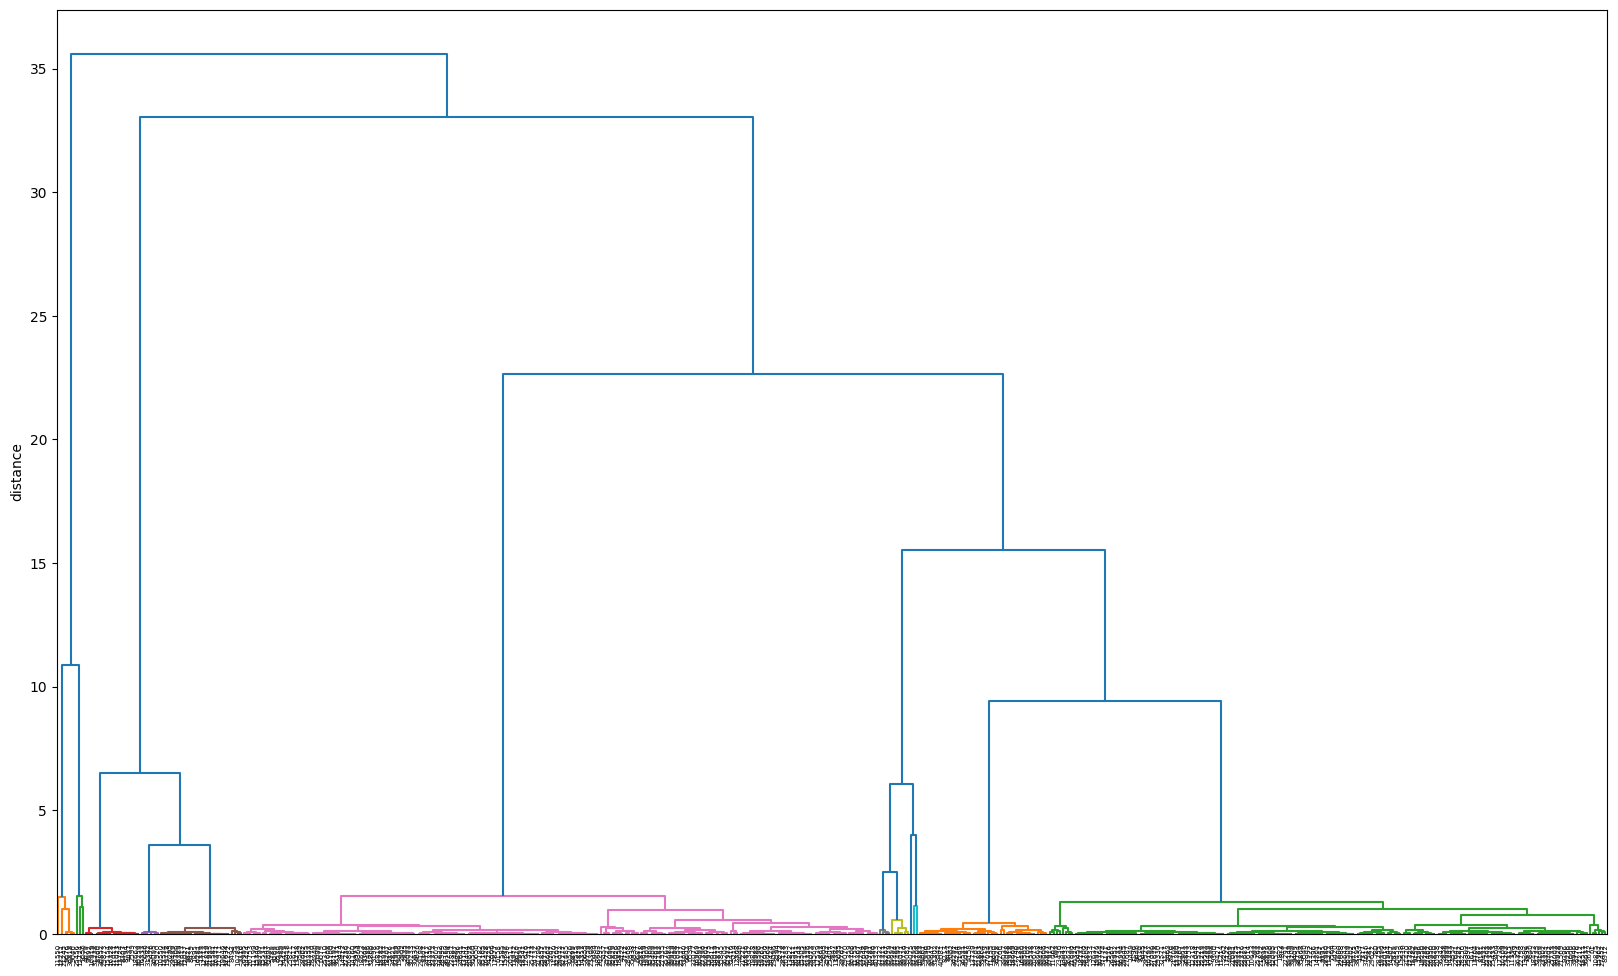

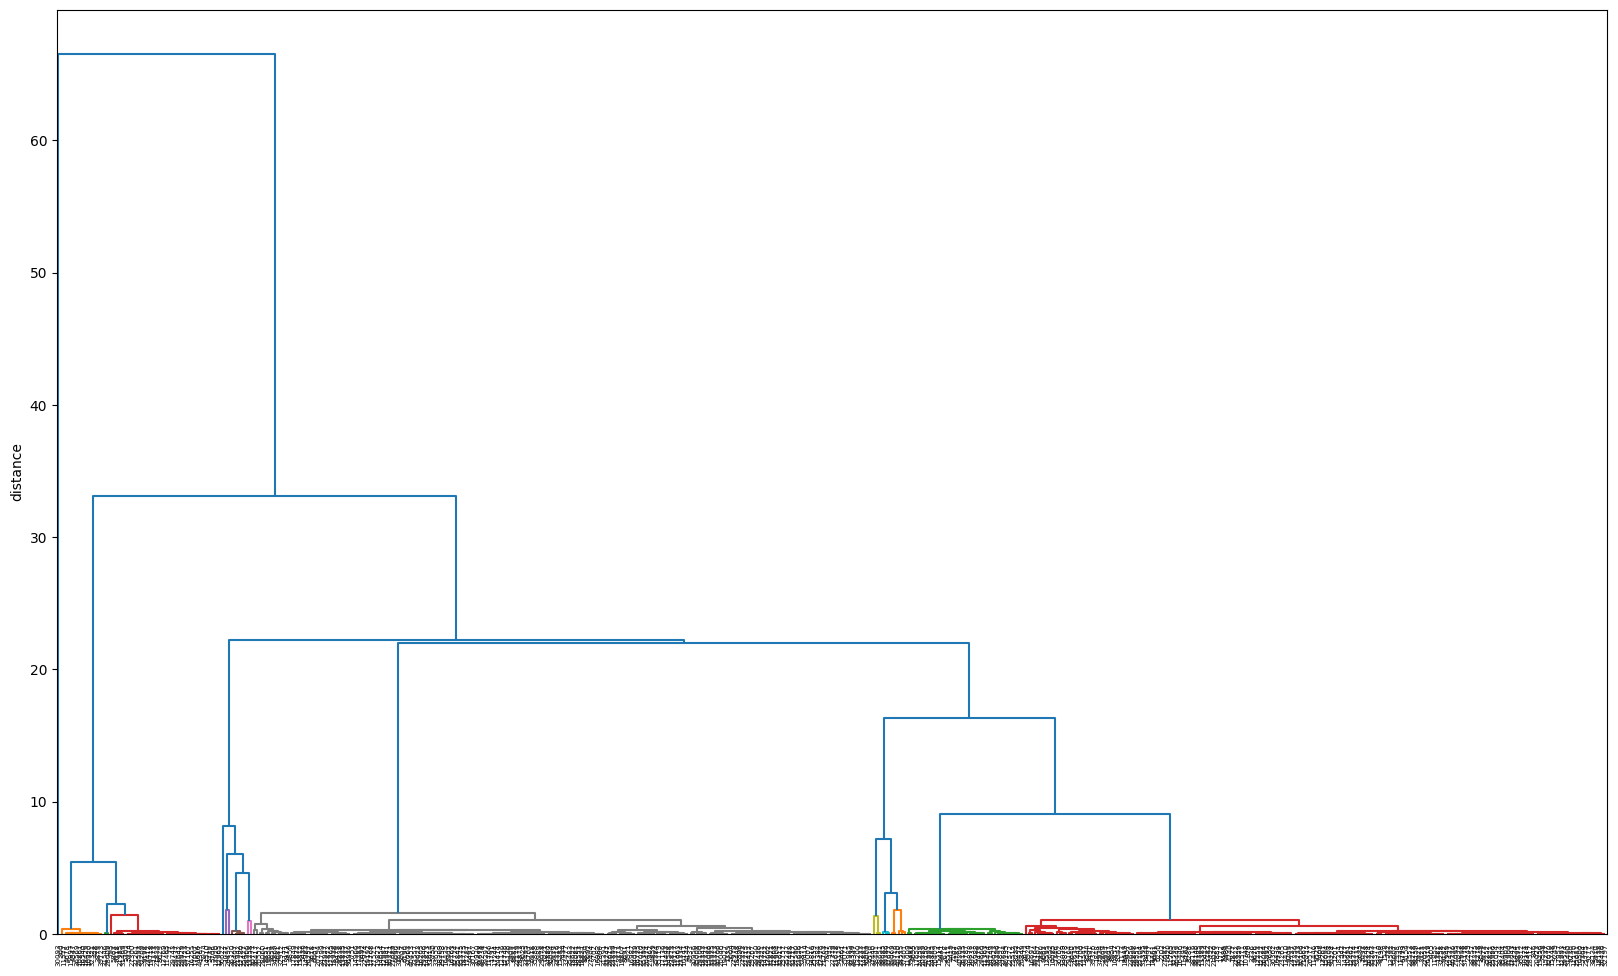

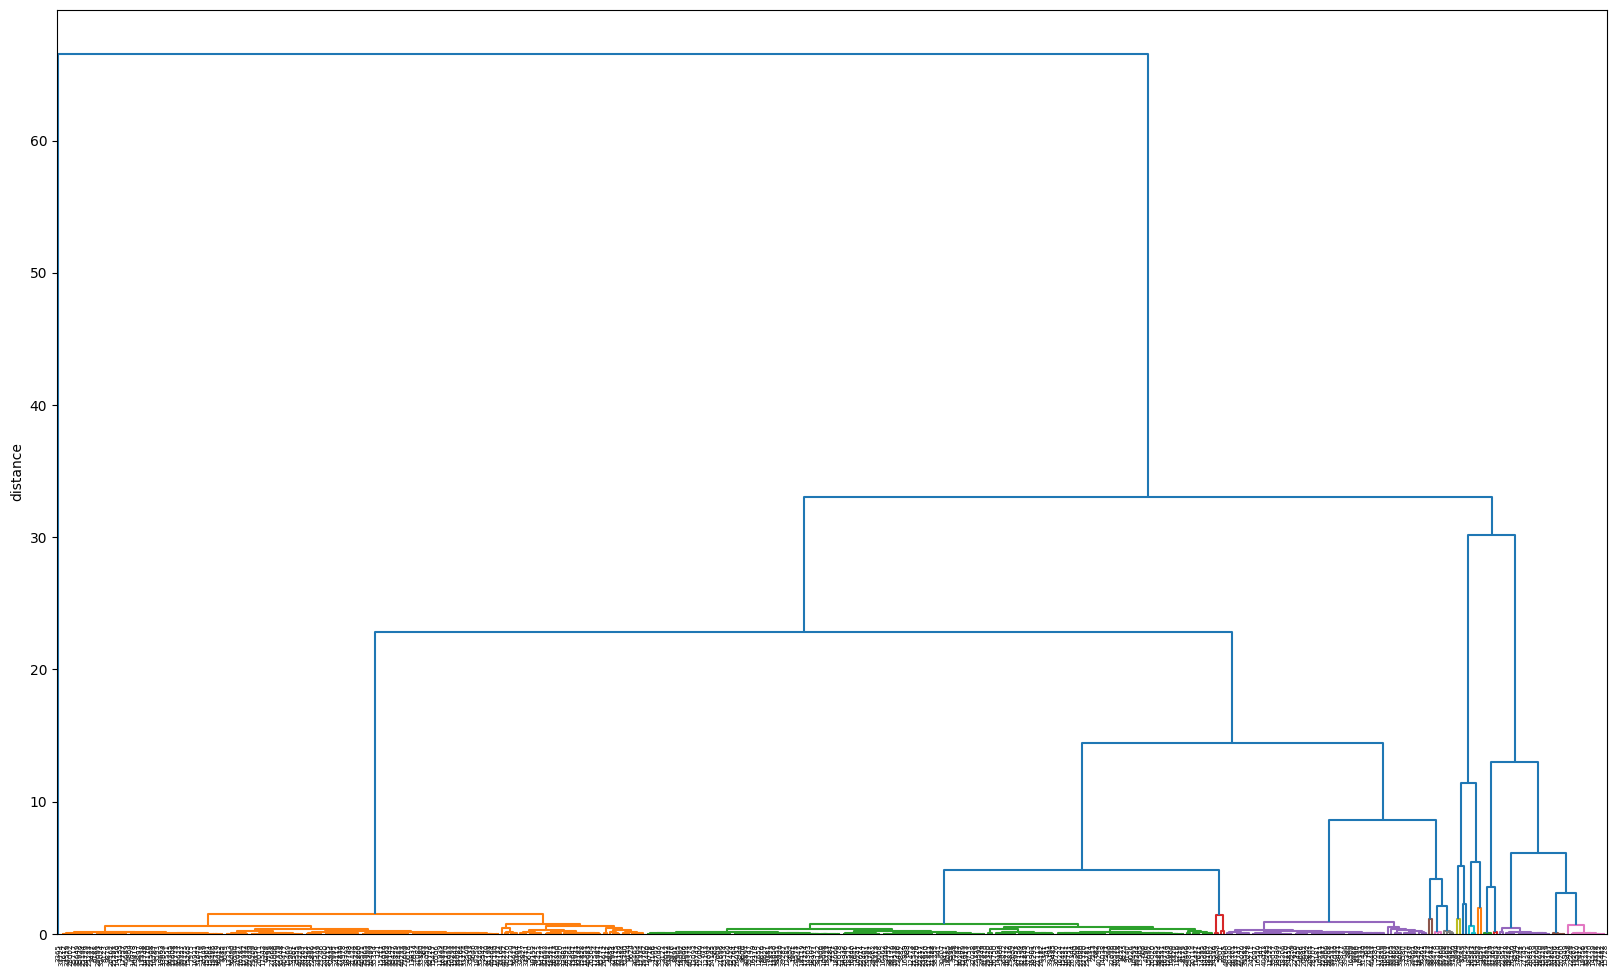

In [80]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method="ward")

fig, ax1 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax1, color_threshold=2)
plt.xticks(rotation=90)
ax1.set_ylabel("distance")
plt.show()

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method="ward")

fig, ax2 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax2, color_threshold=2)
plt.xticks(rotation=90)
ax2.set_ylabel("distance")
plt.show()


import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method="ward")

fig, ax3 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax3, color_threshold=2)
plt.xticks(rotation=90)
ax3.set_ylabel("distance")
plt.show()

#### Based on dendrogram , we can observe there are 3 clusters in the data based on similarity
#### Further checking appropriate number of clusters using Elbow Method using k-Means clustering :

#### KMeans

In [118]:
for i in range(1, 10):
    from sklearn.cluster import KMeans

    k = 4

    kM = KMeans(n_clusters=k, random_state=654)
    y_pred = kM.fit_predict(X_sc)

In [119]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_sc) for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[203725.00000000058,
 122582.35599126313,
 96883.79158428601,
 61994.866166603904,
 24947.572937160665,
 16558.96961117067,
 12266.864911632445,
 7090.107058039212,
 5390.714885256398]

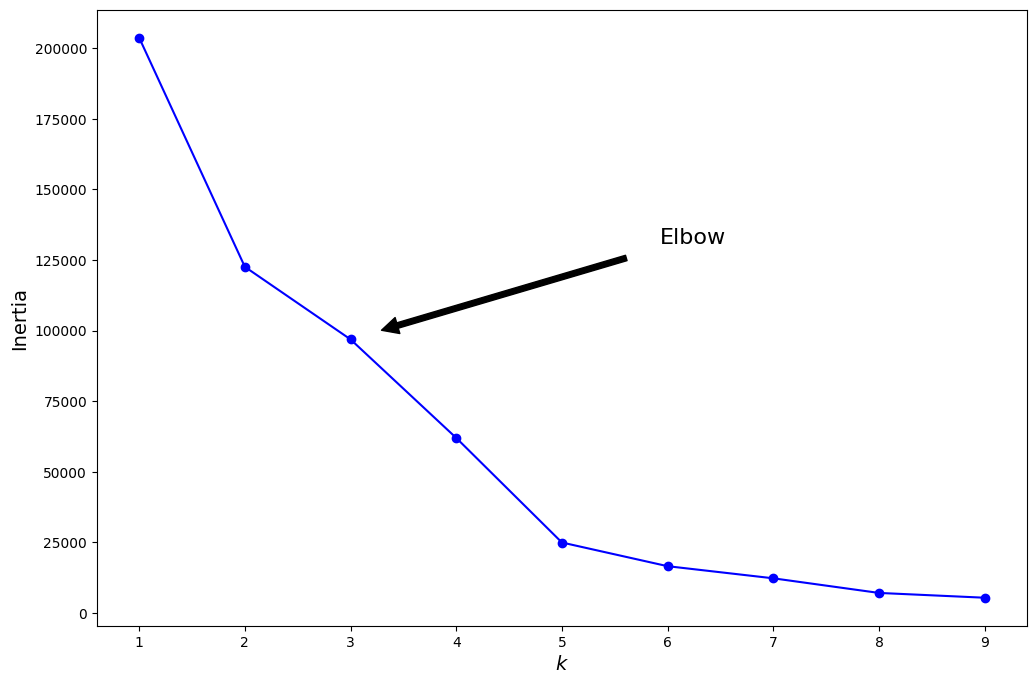

In [120]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate(
    "Elbow",
    xy=(3, inertias[2]),
    xytext=(0.55, 0.55),
    textcoords="figure fraction",
    fontsize=16,
    arrowprops=dict(facecolor="black", shrink=0.1),
)
plt.show()

In [121]:
from sklearn.cluster import KMeans

k = 3

kM = KMeans(n_clusters=k, random_state=654)
y_pred = kM.fit_predict(X_sc)

In [122]:
clusters = pd.DataFrame(df, columns=df.columns)
clusters["label"] = kM.labels_

In [94]:
clusters.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,CTC_updated_year,years_of_experience_in_organization,label
196,zxxn ntwyzgrgsxto rxbxnta,2020.0,430000.0,fullstack engineer,2020.0,0.0,3.0,2
23024,ntrho,2017.0,400000.0,other,2021.0,1.0,6.0,0
37490,vqwtoxhb,2013.0,2400000.0,other,2018.0,1.0,10.0,0
32996,bxwqgogen,2016.0,3300000.0,ios engineer,2021.0,1.0,7.0,0
13701,tastctqct,2007.0,1380000.0,release engineer,2019.0,1.0,16.0,0


In [95]:
clusters.shape

(40745, 8)

<Axes: xlabel='ctc', ylabel='orgyear'>

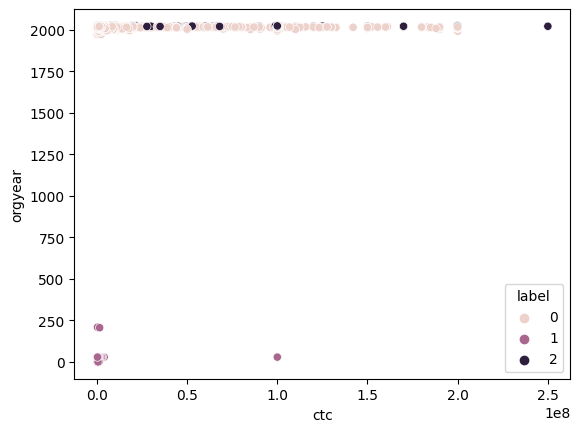

In [123]:
sns.scatterplot(data=clusters, y="orgyear", x="ctc", hue="label")

C:\Users\INACHAVH\AppData\Local\Temp\ipykernel_13032\1952868566.py:1: FutureWarning: The provided callable <function mean at 0x0000000008B0EF20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.crosstab(


<Axes: xlabel='years_of_experience_in_organization'>

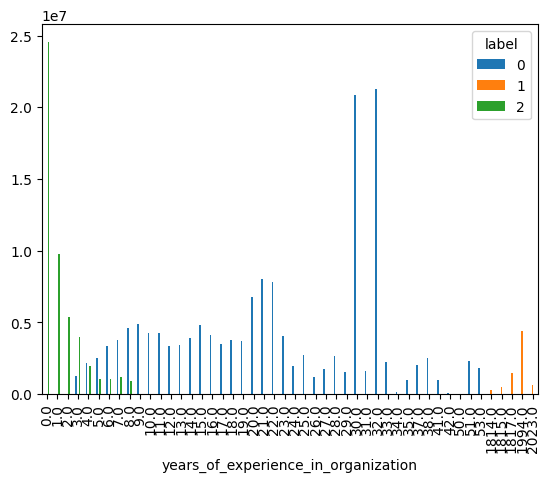

In [124]:
pd.crosstab(
    columns=clusters["label"],
    index=clusters["years_of_experience_in_organization"],
    values=clusters["ctc"],
    aggfunc=np.mean,
).plot(kind="bar")

In [125]:
clusters.groupby("label").describe()[["ctc", "years_of_experience_in_organization"]].T

label                                                 0             1  \
ctc                                 count  3.684100e+04  3.700000e+01   
                                    mean   3.465224e+06  3.580243e+06   
                                    std    1.885454e+07  1.631159e+07   
                                    min    1.000000e+03  1.300000e+05   
                                    25%    4.800000e+05  4.500000e+05   
                                    50%    8.000000e+05  6.700000e+05   
                                    75%    1.370000e+06  1.200000e+06   
                                    max    2.000000e+08  1.000000e+08   
years_of_experience_in_organization count  3.684100e+04  3.700000e+01   
                                    mean   7.441736e+00  1.983432e+03   
                                    std    3.514068e+00  5.159756e+01   
                                    min    3.000000e+00  1.814000e+03   
                                    25%    5.000000e+00  1.994000e+03   
                                    50%    7.000000e+00  1.994000e+03   
                                    75%    9.000000e+00  1.994000e+03   
                                    max    5.300000e+01  2.023000e+03   

label                                                 2  
ctc                                 count  3.867000e+03  
                                    mean   4.391529e+06  
                                    std    2.178869e+07  
                                    min    1.000000e+03  
                                    25%    4.000000e+05  
                                    50%    7.000000e+05  
                                    75%    1.255000e+06  
                                    max    2.500000e+08  
years_of_experience_in_organization count  3.867000e+03  
                                    mean   2.981898e+00  
                                    std    1.110400e+00  
                                    min    0.000000e+00  
                                    25%    2.000000e+00  
                                    50%    3.000000e+00  
                                    75%    3.000000e+00  
                                    max    8.000000e+00

## Insights

 - Top Paying job titles include 'Engineering Leadership', 'Backend Engineer', 'Product Manager', 'Program Manager', 'SDET', 'QA Engineer', 'Data Scientist', 'Android Engineer' and 'FullStack Engineer'.
 - Top paying companies include 'Cisco', 'Intel Technology India Pvt Ltd', 'Amazon', 'Walmart Labs', 'Symantec', 'Schneider Electric India', 'Morgan Stanley', 'Ericsson RD Bangalore' and 'Samsung Electronics'.
 - Among top paying companies, salary for these is getting lesser in recent years, Goldmaan Sachs, Tata Consultancy Services, Samsung Electronics, VMware, Dell, Dbs Bank, Hsbc software devlopement India and GE
 - Among Top paying companies mean salary for these company is increasing every year, Amazon,Microsoft and Huawei Technologies
Avg CTC seems to be decreasing with year.
## Recommendations

 - Freshers who want to work on technical side should look for roles related to Backend Engineer, SDET, QA engineer, Dataa Scientist, Android Engineer,Full stack engineer to get good salaries as expirience increases.
 - Freshers who want best CTC should aim for companies like 'Cisco', 'Intel Technology India Pvt Ltd', 'Amazon', 'Walmart Labs', 'Symantec', 'Schneider Electric India', 'Morgan Stanley', 'Ericsson RD Bangalore' and 'Samsung Electronics'.